### Timeline Analysis : Covid-19


### The following code aims at providing a detailed Timeline Analysis of the Covid affected regions across the world, and visualizing them.

### PROBLEM STATEMENT:
Identify detailed patterns and possible conclusions regarding Covid-19 spread with basic as well as advanced charts.

### Author:SUSMITA MAJUMDER


In [8]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

In [14]:
 
#Reading the Data
covid_data = pd.read_csv('owid-covid-data.csv');
covid_data.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
5,AFG,Asia,Afghanistan,2020-02-29,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
6,AFG,Asia,Afghanistan,2020-03-01,1.0,0.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
7,AFG,Asia,Afghanistan,2020-03-02,1.0,0.0,0.000,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
8,AFG,Asia,Afghanistan,2020-03-03,2.0,1.0,0.143,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
9,AFG,Asia,Afghanistan,2020-03-04,4.0,2.0,0.429,NaN,NaN,0.0,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [15]:
# Analyzing the rows and columns count of the dataset
covid_data.shape

(60701, 55)

In [16]:
# Analyzing the data types of all the attributes present and their count
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60701 entries, 0 to 60700
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               60355 non-null  object 
 1   continent                              59993 non-null  object 
 2   location                               60701 non-null  object 
 3   date                                   60701 non-null  object 
 4   total_cases                            60109 non-null  float64
 5   new_cases                              60102 non-null  float64
 6   new_cases_smoothed                     59147 non-null  float64
 7   total_deaths                           51646 non-null  float64
 8   new_deaths                             51645 non-null  float64
 9   new_deaths_smoothed                    59147 non-null  float64
 10  total_cases_per_million                59763 non-null  float64
 11  ne

In [17]:
# Identifying the columns present
covid_data.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred',
       'new_vaccinations_smoothed_per_mil

In [18]:
# Descripting of the numerical attributes present in the dataset
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,6.010900e+04,60102.000000,59147.000000,5.164600e+04,51645.000000,59147.000000,59763.000000,59756.000000,58806.000000,51313.000000,...,57781.000000,39548.000000,58375.000000,59057.000000,46085.000000,45454.000000,29221.000000,53631.000000,60045.000000,58039.000000
mean,3.046949e+05,3135.398223,3118.695322,9.915895e+03,78.645135,67.347718,5256.650313,58.404583,58.081400,132.149067,...,19191.164553,13.163525,256.194688,7.767232,10.578173,32.637189,51.133277,3.042238,73.143126,0.715803
std,2.993673e+06,27949.916557,27487.805251,7.910267e+04,581.622548,521.629668,10687.412561,164.018688,135.533505,245.370861,...,19668.645139,19.877800,118.062425,3.888514,10.414834,13.451533,31.774439,2.471797,7.548949,0.153767
min,1.000000e+00,-46076.000000,-1121.714000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,...,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.354000
25%,5.050000e+02,1.000000,4.286000,2.700000e+01,0.000000,0.000000,101.804000,0.066000,0.794000,4.615000,...,4541.795000,0.500000,164.905000,5.290000,1.900000,21.600000,20.859000,1.300000,67.440000,0.590000
50%,5.121000e+03,42.000000,51.286000,1.580000e+02,1.000000,0.714000,788.142000,4.743000,6.407000,24.295000,...,13111.214000,2.000000,241.219000,7.110000,6.300000,31.400000,49.839000,2.400000,74.620000,0.750000
75%,5.149000e+04,480.000000,514.071500,1.427000e+03,11.000000,8.286000,4935.724500,43.048500,47.696750,120.748000,...,27216.445000,21.200000,325.721000,10.080000,19.300000,41.100000,83.241000,4.000000,78.570000,0.843000
max,9.504563e+07,862181.000000,738992.714000,2.030831e+06,17330.000000,13718.000000,117556.462000,8652.658000,2648.773000,1915.257000,...,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,98.999000,13.800000,86.750000,0.953000


In [19]:
#Checking for count of all the unique values present for each attribute
covid_data.nunique()

iso_code                                   191
continent                                    6
location                                   192
date                                       384
total_cases                              29706
new_cases                                 7184
new_cases_smoothed                       14853
total_deaths                             10280
new_deaths                                1453
new_deaths_smoothed                       3525
total_cases_per_million                  45290
new_cases_per_million                    25757
new_cases_smoothed_per_million           29053
total_deaths_per_million                 26216
new_deaths_per_million                    5174
new_deaths_smoothed_per_million           6306
reproduction_rate                          361
icu_patients                              1783
icu_patients_per_million                  3547
hosp_patients                             3286
hosp_patients_per_million                 5505
weekly_icu_ad

In [20]:
# Checking for count of NULL values for each column 
covid_data.isnull().sum()

iso_code                                   346
continent                                  708
location                                     0
date                                         0
total_cases                                592
new_cases                                  599
new_cases_smoothed                        1554
total_deaths                              9055
new_deaths                                9056
new_deaths_smoothed                       1554
total_cases_per_million                    938
new_cases_per_million                      945
new_cases_smoothed_per_million            1895
total_deaths_per_million                  9388
new_deaths_per_million                    9389
new_deaths_smoothed_per_million           1895
reproduction_rate                        11945
icu_patients                             54161
icu_patients_per_million                 54161
hosp_patients                            53110
hosp_patients_per_million                53110
weekly_icu_ad

In [21]:
# Continents in terms of occurence of covid cases on basis of iso_codes
covid_data.continent.value_counts()[0:10]

Africa           16626
Asia             15285
Europe           15252
North America     7307
South America     3872
Oceania           1651
Name: continent, dtype: int64

In [22]:
# Analyzing cases worldwide 
dataset = covid_data[covid_data['date']=='2020-11-15']
dataset = dataset[~dataset['location'].isin(['World','International'])]
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
265,AFG,Asia,Afghanistan,2020-11-15,43240.0,205.0,154.429,1620.0,12.0,7.857,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.498
580,ALB,Europe,Albania,2020-11-15,27830.0,597.0,517.714,623.0,11.0,9.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.785
908,DZA,Africa,Algeria,2020-11-15,67679.0,860.0,804.000,2154.0,15.0,15.143,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.754
1230,AND,Europe,Andorra,2020-11-15,5872.0,147.0,69.857,76.0,1.0,0.143,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.858
1534,AGO,Africa,Angola,2020-11-15,13451.0,77.0,145.429,322.0,0.0,2.143,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
1845,ATG,North America,Antigua and Barbuda,2020-11-15,134.0,0.0,0.429,4.0,0.0,0.143,...,21490.943,NaN,191.511,13.17,NaN,NaN,NaN,3.80,77.02,0.780
2228,ARG,South America,Argentina,2020-11-15,1310491.0,5645.0,9758.429,35436.0,129.0,268.000,...,18933.907,0.6,191.032,5.50,16.2,27.7,NaN,5.00,76.67,0.825
2551,ARM,Asia,Armenia,2020-11-15,117337.0,1482.0,1559.000,1763.0,25.0,29.143,...,8787.580,1.8,341.010,7.11,1.5,52.1,94.043,4.20,75.09,0.755
2909,AUS,Oceania,Australia,2020-11-15,27749.0,38.0,12.000,907.0,0.0,0.000,...,44648.710,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
3237,AUT,Europe,Austria,2020-11-15,203956.0,5665.0,7257.571,1829.0,83.0,59.714,...,45436.686,0.7,145.183,6.35,28.4,30.9,NaN,7.37,81.54,0.908


In [32]:
# looking at different locations
covid_data["location"].value_counts()  

Mexico              383
Argentina           383
Thailand            380
Taiwan              368
South Korea         363
                   ... 
Solomon Islands      98
Hong Kong            83
Marshall Islands     82
Vanuatu              69
Samoa                61
Name: location, Length: 192, dtype: int64

In [35]:
# covid cases in india

india=covid_data[covid_data["location"]=="India"]

In [36]:
india.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
24472,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24473,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24474,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24475,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64
24476,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64


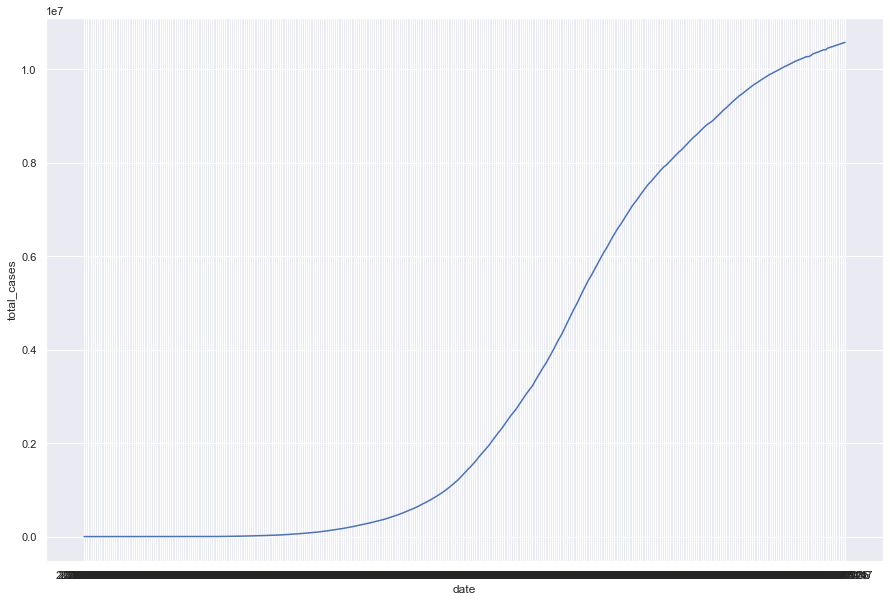

In [37]:
#Data Visualization
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india)
plt.show()

In [38]:
india_last_5_days=india.tail()

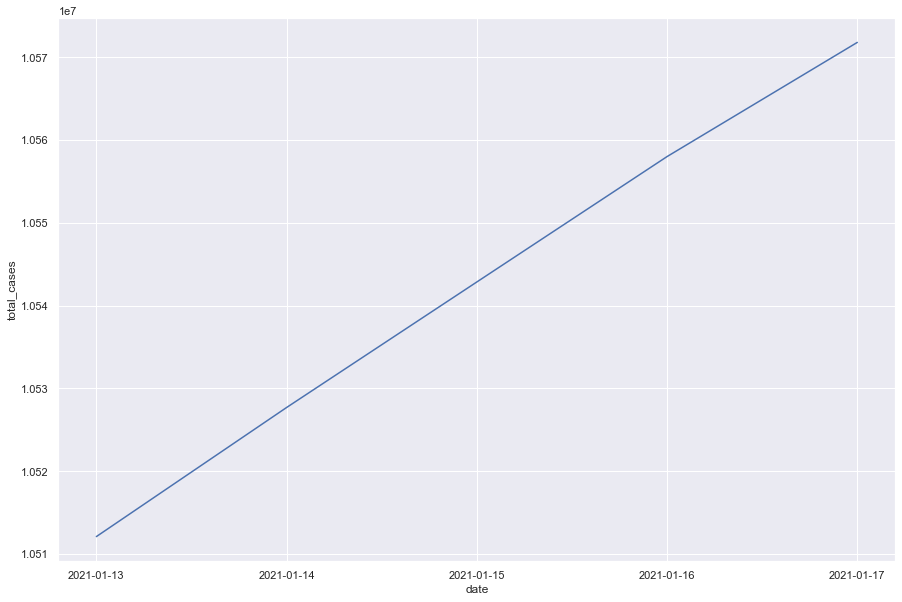

In [39]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=india_last_5_days)
plt.show()

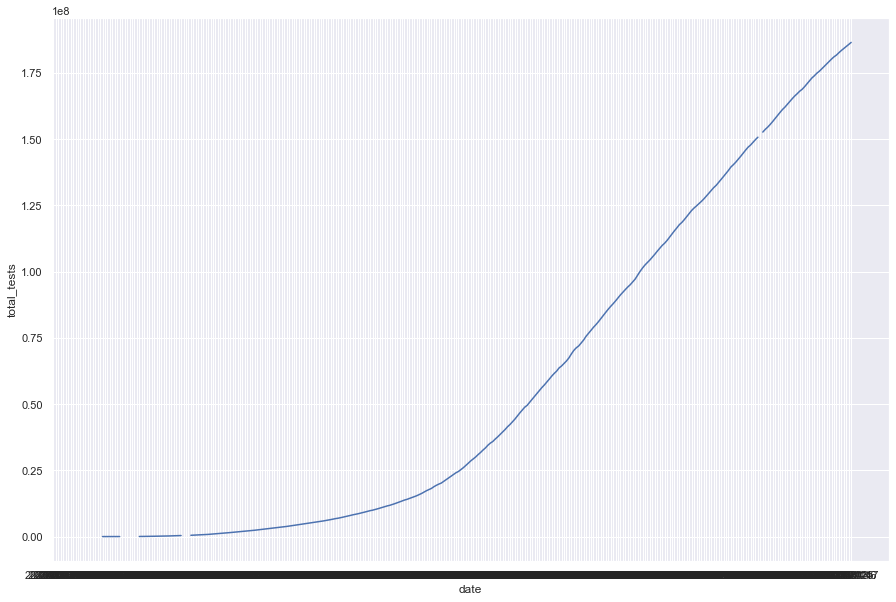

In [41]:
# total test per day

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india)
plt.show()

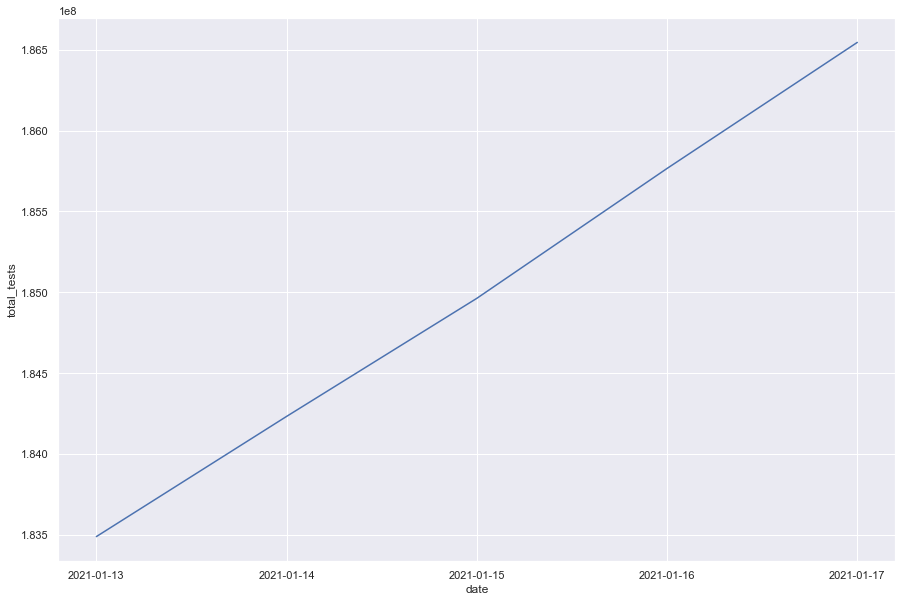

In [42]:
# total test last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_tests",data=india_last_5_days)
plt.show()

In [45]:
# covid cases in Brazil

brazil=covid_data[covid_data["location"]=="Brazil"]


In [46]:

brazil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7416,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7417,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7418,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7419,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7420,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [47]:
brazil.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
7738,BRA,South America,Brazil,2021-01-13,8256536.0,60899.0,54672.286,205964.0,1274.0,998.571,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7739,BRA,South America,Brazil,2021-01-14,8324294.0,67758.0,51803.000,207095.0,1131.0,942.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7740,BRA,South America,Brazil,2021-01-15,8393492.0,69198.0,54254.857,208246.0,1151.0,969.429,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7741,BRA,South America,Brazil,2021-01-16,8455059.0,61567.0,54151.571,209296.0,1050.0,952.143,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759
7742,BRA,South America,Brazil,2021-01-17,8488099.0,33040.0,54615.571,209847.0,551.0,963.857,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.759


In [48]:
brazil_last_5_days=brazil.tail()

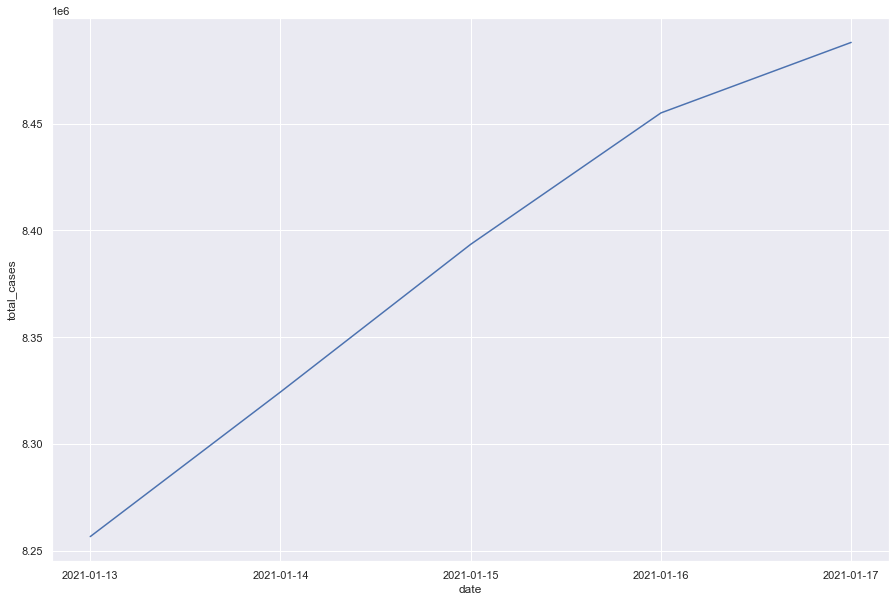

In [49]:
# total cases last 5 days

sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x="date",y="total_cases",data=brazil_last_5_days)
plt.show()

In [51]:
# understanding cases of india,china and japan

india_japan_china=covid_data[(covid_data["location"]=="India") | (covid_data["location"]=="China") | (covid_data["location"]=="Japan")]

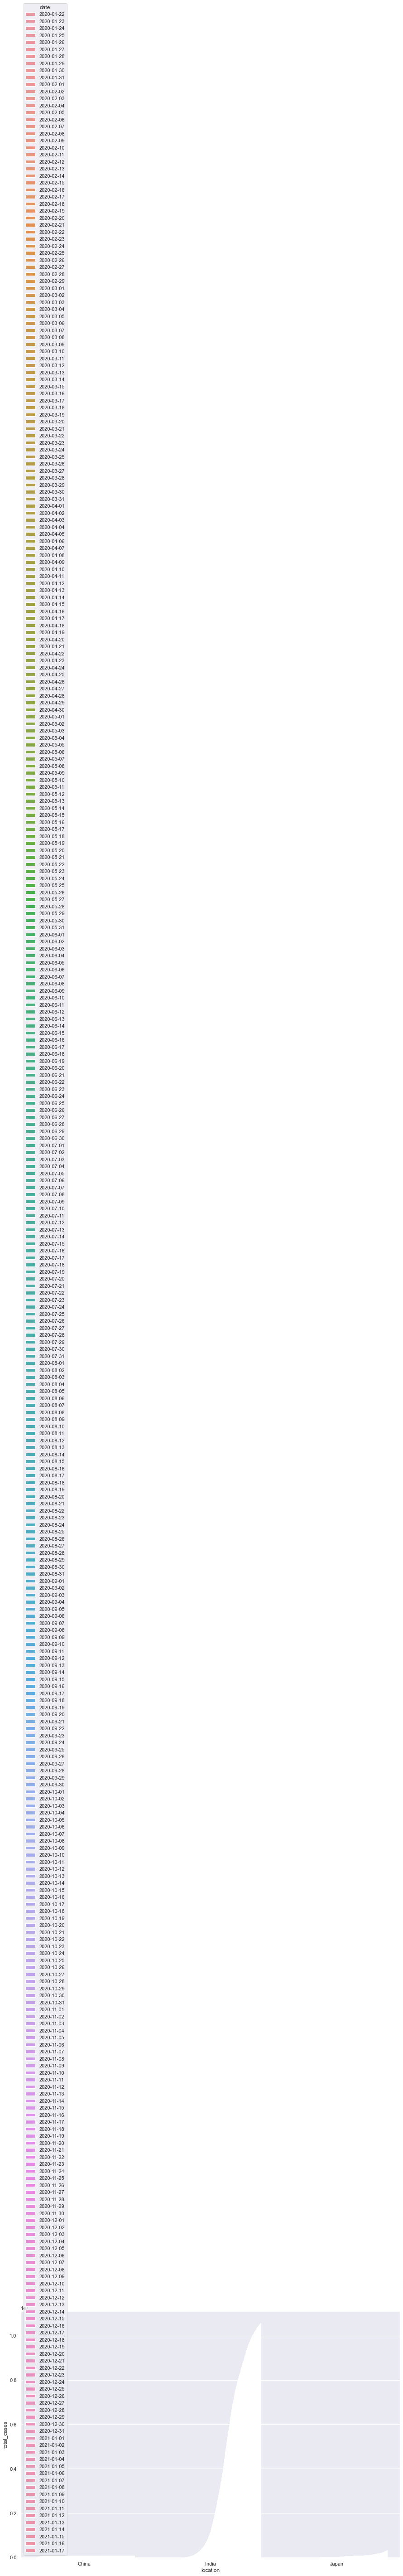

In [52]:

# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=india_japan_china,hue="date")
plt.show()

In [53]:
# understanding cases of germany and spain


germany_spain=covid_data[(covid_data["location"]=="Germany") | (covid_data["location"]=="Spain")]

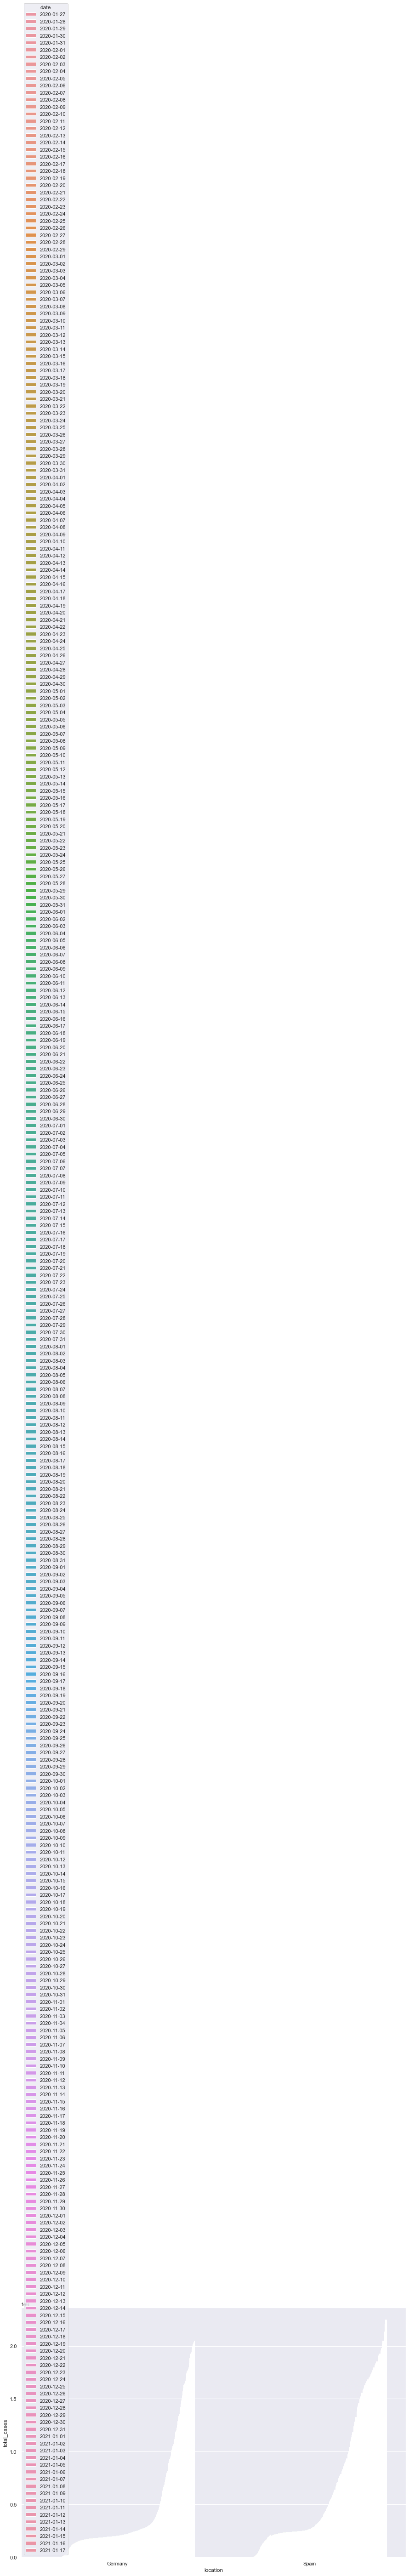

In [54]:
# total cases 

sns.set(rc={"figure.figsize":(15,10)})
sns.barplot(x="location",y="total_cases",data=germany_spain,hue="date")
plt.show()

In [55]:
# getting latset data

last_day_cases=covid_data[(covid_data["date"]=="2020-12-18")]
last_day_cases


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
298,AFG,Asia,Afghanistan,2020-12-18,49621.0,243.0,215.000,2030.0,5.0,12.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.500,64.83,0.498
613,ALB,Europe,Albania,2020-12-18,52004.0,580.0,734.429,1066.0,11.0,12.714,...,11803.431,1.1,304.195,10.08,7.100,51.200,NaN,2.890,78.57,0.785
941,DZA,Africa,Algeria,2020-12-18,94371.0,438.0,464.286,2647.0,7.0,10.286,...,13913.839,0.5,278.364,6.73,0.700,30.400,83.741,1.900,76.88,0.754
1263,AND,Europe,Andorra,2020-12-18,7519.0,53.0,40.429,80.0,1.0,0.286,...,NaN,NaN,109.135,7.97,29.000,37.800,NaN,NaN,83.73,0.858
1567,AGO,Africa,Angola,2020-12-18,16562.0,78.0,71.571,384.0,2.0,2.714,...,5819.495,NaN,276.045,3.94,NaN,NaN,26.664,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59415,VNM,Asia,Vietnam,2020-12-18,1410.0,3.0,2.714,35.0,0.0,0.000,...,6171.884,2.0,245.465,6.00,1.000,45.900,85.847,2.600,75.40,0.694
59777,OWID_WRL,NaN,World,2020-12-18,75727105.0,718159.0,644752.286,1675076.0,12630.0,11422.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
60060,YEM,Asia,Yemen,2020-12-18,2087.0,0.0,0.714,606.0,0.0,0.000,...,1479.147,18.8,495.003,5.35,7.600,29.200,49.542,0.700,66.12,0.452
60366,ZMB,Africa,Zambia,2020-12-18,18575.0,71.0,59.143,373.0,4.0,1.143,...,3689.251,57.5,234.499,3.94,3.100,24.700,13.938,2.000,63.89,0.588


In [56]:
# sorting date w.r.t to total cases

max_cases_country=last_day_cases.sort_values(by="total_cases",ascending=False)
max_cases_country

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
59777,OWID_WRL,NaN,World,2020-12-18,75727105.0,718159.0,644752.286,1675076.0,12630.0,11422.714,...,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,NaN
57737,USA,North America,United States,2020-12-18,17513587.0,250215.0,220057.429,313824.0,2806.0,2576.429,...,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.924
24795,IND,Asia,India,2020-12-18,10004599.0,25152.0,25403.429,145136.0,347.0,358.286,...,6426.674,21.2,282.280,10.39,1.900,20.600,59.550,0.530,69.66,0.640
7712,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,...,14103.452,3.4,177.961,8.11,10.100,17.900,NaN,2.200,75.88,0.759
44900,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,...,24765.954,0.1,431.297,6.18,23.400,58.300,NaN,8.050,72.58,0.816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,VAT,Europe,Vatican,2020-12-18,27.0,0.0,0.000,NaN,NaN,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.12,NaN
49509,SLB,Oceania,Solomon Islands,2020-12-18,17.0,0.0,0.000,NaN,NaN,0.000,...,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.546
34547,MHL,Oceania,Marshall Islands,2020-12-18,4.0,0.0,0.000,NaN,NaN,0.000,...,3819.202,NaN,557.793,30.53,NaN,NaN,82.502,2.700,73.70,0.708
46190,WSM,Oceania,Samoa,2020-12-18,2.0,0.0,0.000,NaN,NaN,0.000,...,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.713


In [57]:
# top 5 countries with maximum case
max_cases_country[1:6]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
57737,USA,North America,United States,2020-12-18,17513587.0,250215.0,220057.429,313824.0,2806.0,2576.429,...,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86,0.924
24795,IND,Asia,India,2020-12-18,10004599.0,25152.0,25403.429,145136.0,347.0,358.286,...,6426.674,21.2,282.280,10.39,1.9,20.6,59.55,0.53,69.66,0.640
7712,BRA,South America,Brazil,2020-12-18,7162978.0,52544.0,46678.714,185650.0,823.0,744.714,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
44900,RUS,Europe,Russia,2020-12-18,2764843.0,28116.0,27217.714,49170.0,602.0,542.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
19593,FRA,Europe,France,2020-12-18,2499529.0,16005.0,13207.143,60345.0,612.0,381.857,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901


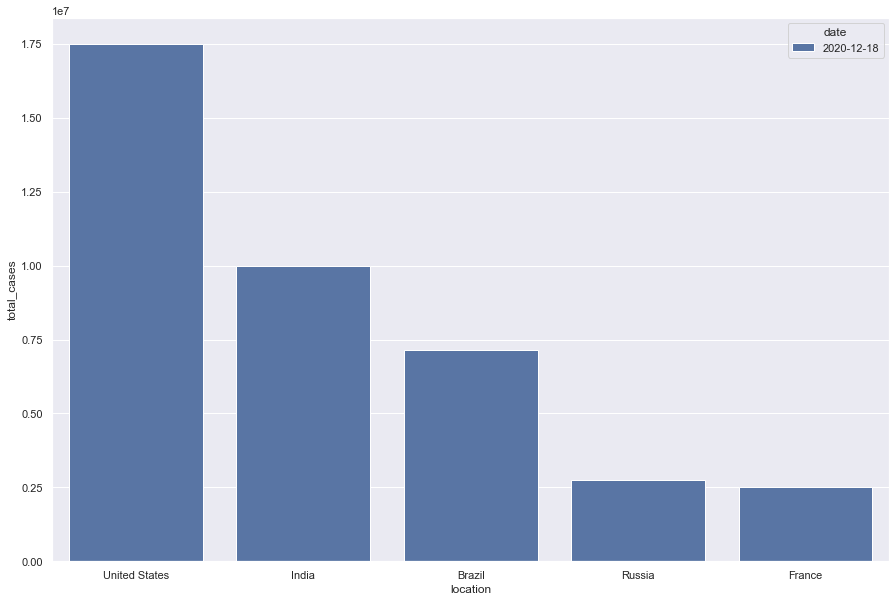

In [59]:
# plot on bar plot

sns.barplot(x="location",y="total_cases",data=max_cases_country[1:6],hue="date")
plt.show()

## Thankyou